# Packet Breakdown 

## Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # change de style here!

%matplotlib inline

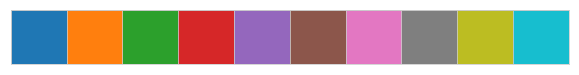

In [2]:
sns.palplot(sns.color_palette())

In [3]:
# deixar a pasta scripts vizivel no notebook
%load_ext autoreload
%autoreload 2

import sys
import os

module_path = os.path.abspath(os.path.join('..', 'pyscripts'))
if module_path not in sys.path :
    sys.path.append(module_path)

In [4]:
# import module from scripts folder
import process_data

## Pre processing 

In [5]:
## import dataset from ../data
data_folder = os.path.join('..','Simulations')

simulations = ['PA','PB','CL2','CL4','CLBinomial']

# the same file will be searching
main_file = 'packet_breakdown_percentage.txt' 

df_data = pd.DataFrame()

for folder in simulations:
    data_file = os.path.join(data_folder,folder,main_file)
    df = process_data.parser_main_table(data_file)
    df['Simulation'] = folder
    df_data = df_data.append(df,ignore_index=True)

del df


In [6]:
df_data.sample(5)

,info_0,info_1,info_2,"Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",Simulation
30,setRateHigh,InterfModel=0,node=1,0,0.02086,0.22597,0.5985,0.15467,PB
62,setRateHigh,InterfModel=0,node=3,0,0.02388,0.06065,0.7393,0.17617,CL2
25,setRateMedium,InterfModel=2,node=1,0,0.00024,0.02576,0.88884,0.08516,PA
52,setRateMedium,InterfModel=0,node=3,0,0.00055,0.31621,0.59953,0.08371,PB
143,setRateMedium,InterfModel=0,node=4,0,0.00051,0.02717,0.85345,0.11888,CLBinomial


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
info_0                     150 non-null object
info_1                     150 non-null object
info_2                     150 non-null object
Failed, buffer overflow    150 non-null object
Failed, busy channel       150 non-null object
Failed, no ack             150 non-null object
Success, first try         150 non-null object
Success, not first try     150 non-null object
Simulation                 150 non-null object
dtypes: object(9)
memory usage: 10.6+ KB


### Normalizando os dados

In [8]:
numericColumns = [
    'Failed, buffer overflow',
    'Failed, busy channel' ,
    'Failed, no ack',
    'Success, first try',
    'Success, not first try'
]

df_data[numericColumns] = df_data[numericColumns].astype('float')
df_data[numericColumns] *= 100

In [9]:
nodes_PTbr = {
        'node=1': 'E-Punho',
        'node=2': 'D-Punho',
        'node=3': 'E-Tornozelo',
        'node=4': 'D-Tornozelo',
        'node=5': 'Peito',
        'node=0': 'Sink'
    }

nodes_ENG = {
        'node=1': 'L-wrist',
        'node=2': 'R-wrist',
        'node=3': 'L-ankle',
        'node=4': 'R-ankle',
        'node=5': 'chest',
        'node=0': 'sink'
    }

def infer_node(value,mapper=nodes_PTbr):
    return mapper.get(value,value)

df_data['info_2'] = df_data['info_2'].apply(infer_node)

In [10]:
taxa_dados = {
    'setRateLow' : 'baixa',
    'setRateMedium': 'média',
    'setRateHigh' : 'alta'
}

packet_rate = {
    'setRateLow' : 'low',
    'setRateMedium': 'medium',
    'setRateHigh' : 'high'
}

def infer_packet_rate(value,mapper=taxa_dados):
    return mapper.get(value,value)

df_data['info_0'] = df_data['info_0'].apply(infer_packet_rate)

In [11]:
modelo_colisao = {
    'InterfModel=0': 'sem colisão',
    'InterfModel=2': 'com colisão'
}

collision_model = {
    'InterfModel=0': 'without collision',
    'InterfModel=2': 'with collision'
}

def infer_collision_model(value,mapper=modelo_colisao):
    return mapper.get(value,value)

df_data['info_1'] = df_data['info_1'].apply(infer_collision_model)

### Renomeando colunas

In [12]:
columns_portuguese = {
    'info_0' : 'Taxa dados',
    'info_1' : 'Modelo de colisão',
    'info_2' : 'Nó sensor',
    'Failed, buffer overflow': 'Falha, estouro de buffer',
    'Failed, busy channel' : 'Falha, canal ocupado',
    'Failed, no ack': 'Falha, não recebimento ACK', 
    'Success, first try' : 'Sucesso, primeira tentativa',
    'Success, not first try' : 'Sucesso, retransmissão',
    'Simulation' : 'Simulação'
}

columns_english = {
    'info_0' : 'Packet Rate',
    'info_1' : 'Collision Model',
    'info_2' : 'Sensor Node',
}

df_data.rename(mapper=columns_portuguese,axis='columns', inplace=True)

In [13]:
df_data.sample(5)

,Taxa dados,Modelo de colisão,Nó sensor,"Falha, estouro de buffer","Falha, canal ocupado","Falha, não recebimento ACK","Sucesso, primeira tentativa","Sucesso, retransmissão",Simulação
34,alta,sem colisão,Peito,27.691,3.360000e-01,20.127,42.497,9.349,PB
67,alta,com colisão,E-Tornozelo,0.000,2.275000e+00,8.500,71.714,17.511,CL2
35,alta,com colisão,E-Punho,0.000,2.001000e+00,32.144,51.550,14.305,PB
131,baixa,sem colisão,D-Punho,0.000,0.000000e+00,0.187,94.618,5.195,CLBinomial
10,baixa,sem colisão,E-Punho,0.000,5.000000e+07,1.715,92.827,5.453,PA


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
Taxa dados                     150 non-null object
Modelo de colisão              150 non-null object
Nó sensor                      150 non-null object
Falha, estouro de buffer       150 non-null float64
Falha, canal ocupado           150 non-null float64
Falha, não recebimento ACK     150 non-null float64
Sucesso, primeira tentativa    150 non-null float64
Sucesso, retransmissão         150 non-null float64
Simulação                      150 non-null object
dtypes: float64(5), object(4)
memory usage: 10.6+ KB


In [15]:
df = df_data.describe()
df

,"Falha, estouro de buffer","Falha, canal ocupado","Falha, não recebimento ACK","Sucesso, primeira tentativa","Sucesso, retransmissão"
count,150.000000,1.500000e+02,150.000000,150.000000,150.000000
mean,2.527367,4.400001e+06,7.241113,78.973667,10.524413
std,6.470681,1.430633e+07,8.447456,12.721066,4.445095
min,0.000000,0.000000e+00,0.162000,30.286000,2.919000
25%,0.000000,0.000000e+00,2.422250,70.191250,7.243000
50%,0.000000,6.100000e-02,4.242000,82.887000,10.021000
75%,0.000000,2.297750e+00,7.196000,89.206250,12.473250
max,34.464000,7.000000e+07,36.814000,96.874000,20.170000


In [16]:
value_vars = set(df.columns) - set(['Sucesso, primeira tentativa', 'Sucesso, retransmissão'])
value_vars = list(value_vars)
id_vars = set(df_data.columns) - set(df.columns)
id_vars = list(id_vars)

In [17]:
melted_data = df_data.melt(id_vars=id_vars,
                     value_vars=value_vars,
                     value_name='Valor',
                     var_name='Mac breakdown'
                    )

In [18]:
melted_data.head()

,Simulação,Modelo de colisão,Nó sensor,Taxa dados,Mac breakdown,Valor
0,PA,sem colisão,E-Punho,alta,"Falha, estouro de buffer",0.000
1,PA,sem colisão,D-Punho,alta,"Falha, estouro de buffer",0.000
2,PA,sem colisão,E-Tornozelo,alta,"Falha, estouro de buffer",0.000
3,PA,sem colisão,D-Tornozelo,alta,"Falha, estouro de buffer",12.939
4,PA,sem colisão,Peito,alta,"Falha, estouro de buffer",14.335


## Visualization

In [19]:
chart_options = dict(data=df_data,
                x='Taxa dados',
                y='Sucesso, primeira tentativa',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                order=['baixa', 'média', 'alta'],
                col='Modelo de colisão',
                row='Nó sensor',
                kind='bar',
                height=3,
                aspect=2,
                sharex=False,
                sharey=False
                )

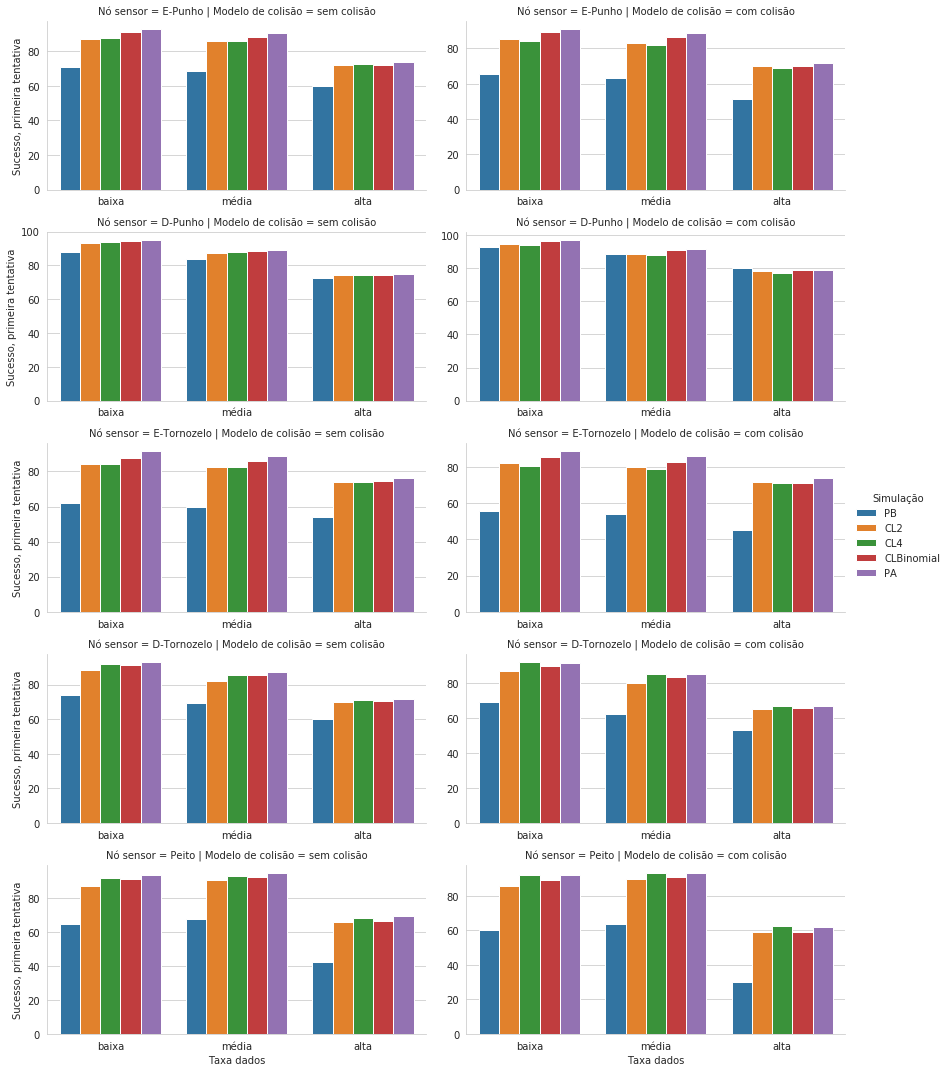

In [20]:
ax = sns.catplot(**chart_options)

# ax.set(ylim=(40,100))

In [21]:
chart_options = dict(data=df_data,
                x='Nó sensor',
                y='Sucesso, primeira tentativa',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                row='Modelo de colisão',
                col='Taxa dados',
                col_order=['baixa', 'média', 'alta'],
                kind='bar',
                height=3,
                aspect=3,
                sharex=False,
                sharey=False
                )

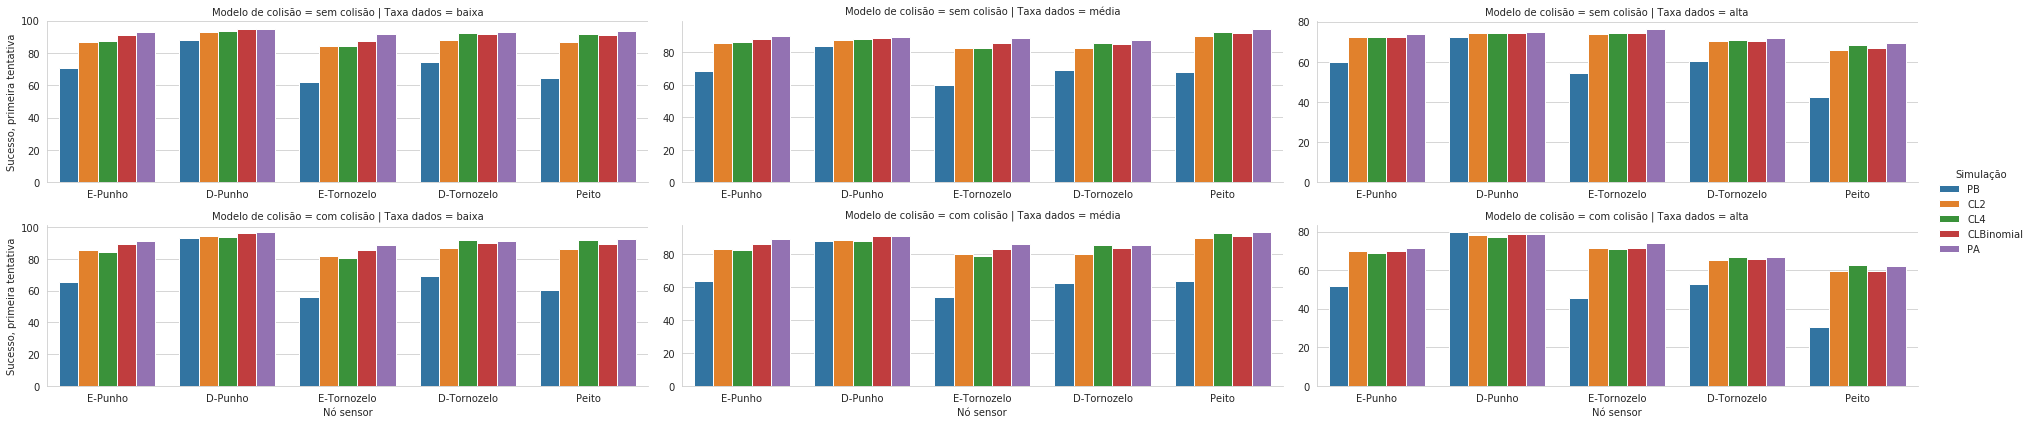

In [22]:
chart_options.update({'y' : 'Sucesso, primeira tentativa'})

ax = sns.catplot(**chart_options)

# ax.set(ylim=(40,100))

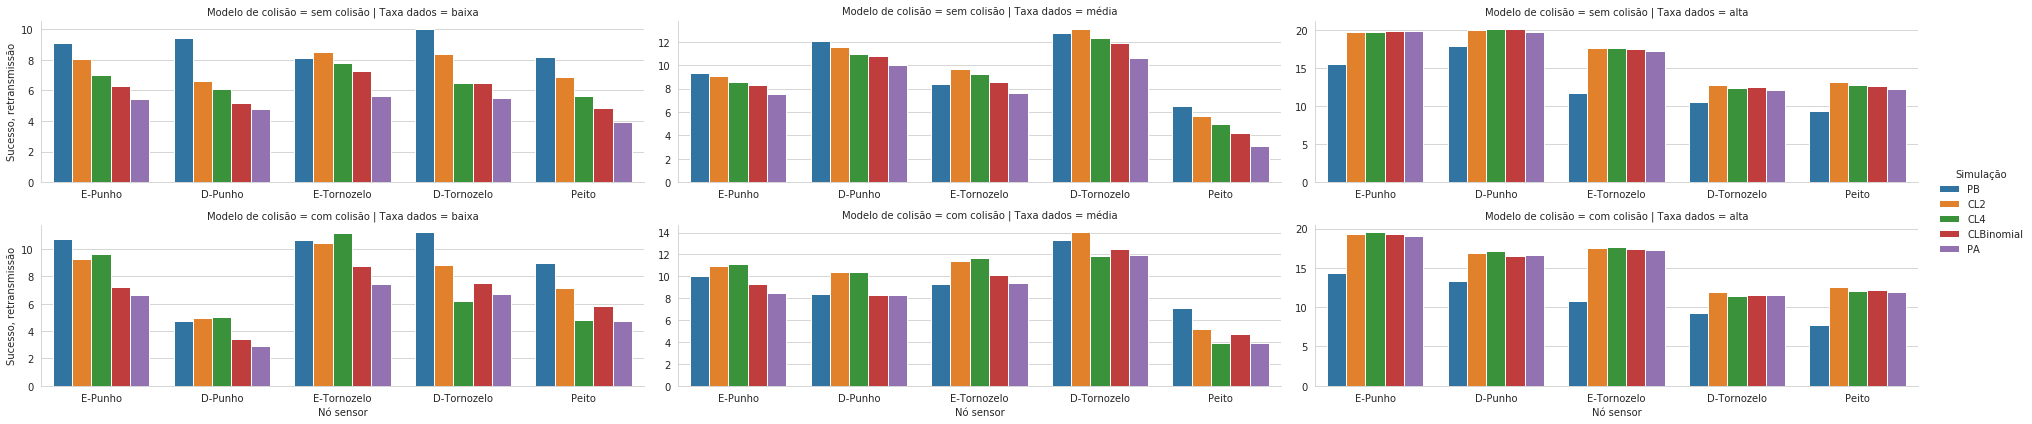

In [23]:
chart_options.update({'y' : 'Sucesso, retransmissão'})

ax = sns.catplot(**chart_options)

# ax.set(ylim=(0,25))

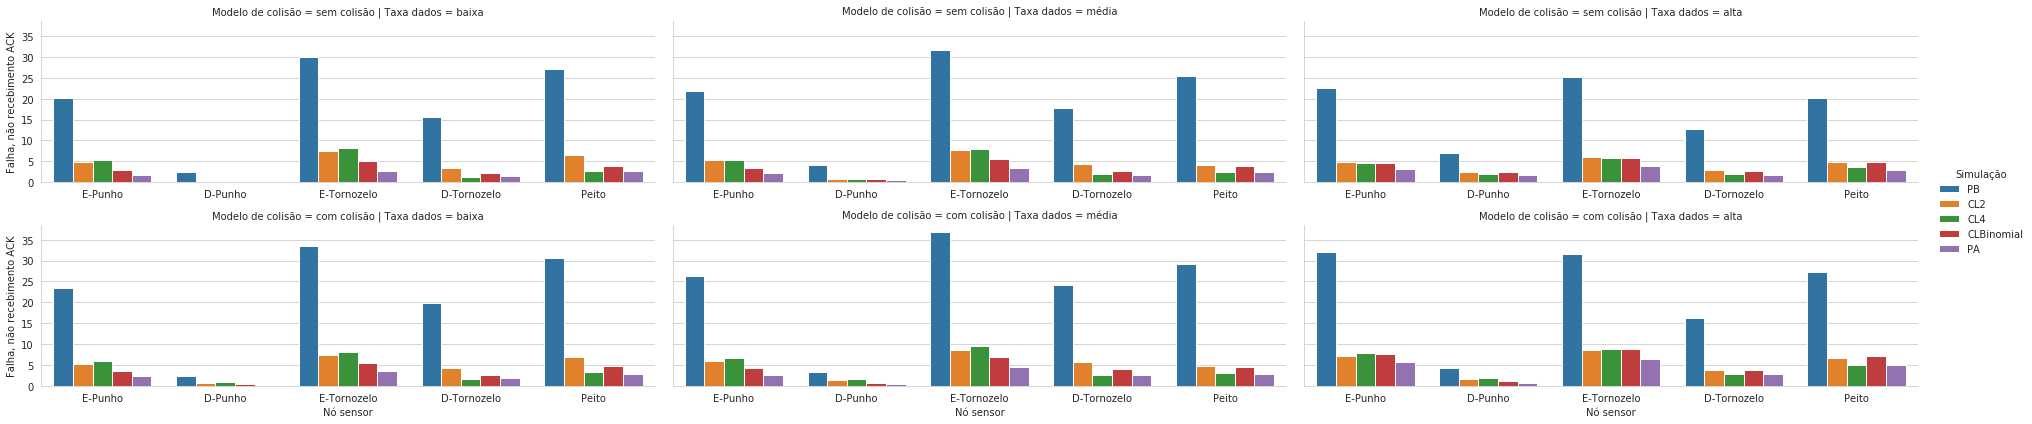

In [24]:
chart_options.update({'y' : 'Falha, não recebimento ACK', 'sharey' : True})

ax = sns.catplot(**chart_options)

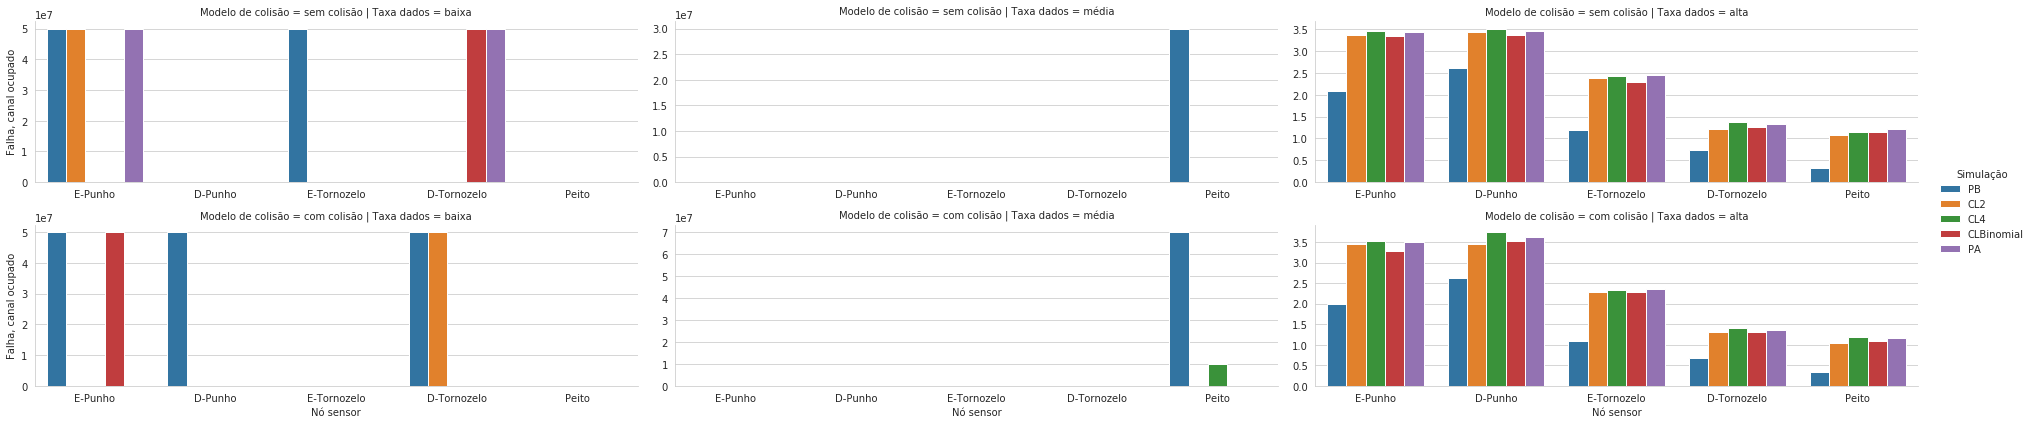

In [25]:
chart_options.update({'y' : 'Falha, canal ocupado', 'sharey' : False})

ax = sns.catplot(**chart_options)

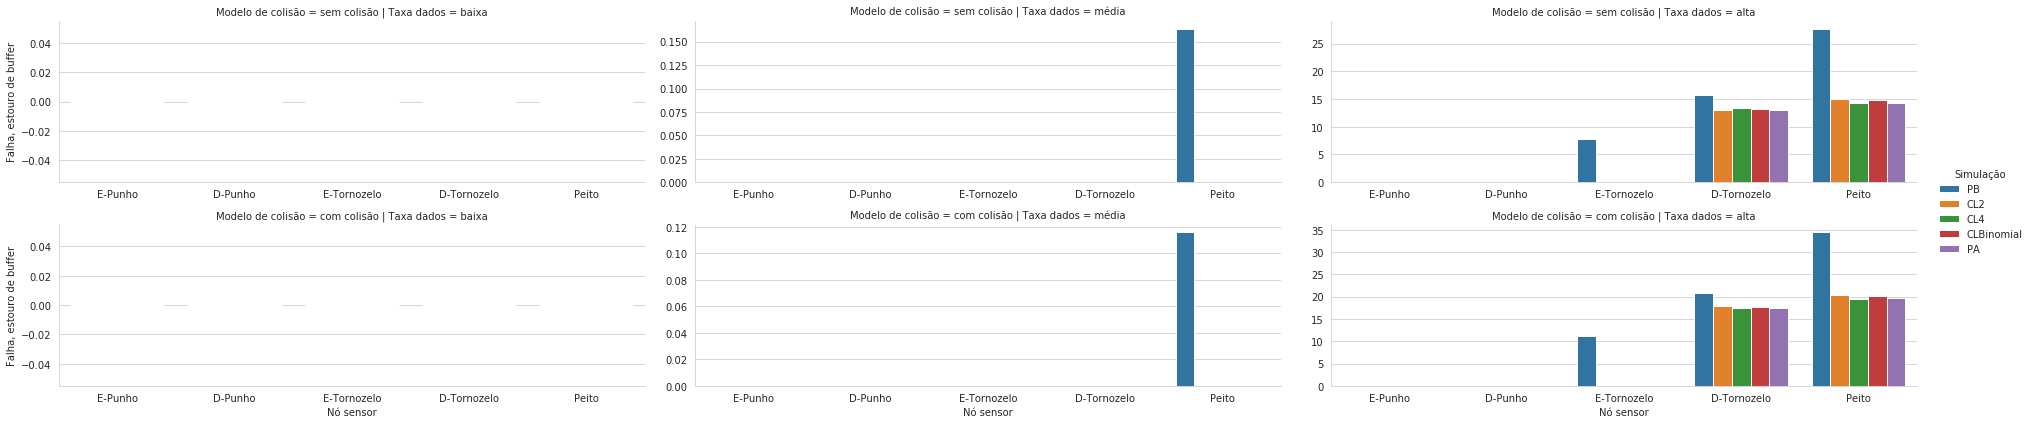

In [26]:
chart_options.update({'y' : 'Falha, estouro de buffer', 'sharey' : False})

ax = sns.catplot(**chart_options)

# ax.set(ylim=(0,25))

In [27]:
melted_data.columns

Index(['Simulação', 'Modelo de colisão', 'Nó sensor', 'Taxa dados',
       'Mac breakdown', 'Valor'],
      dtype='object')

In [28]:
melted_data['Mac breakdown'].unique()

array(['Falha, estouro de buffer', 'Falha, canal ocupado',
       'Falha, não recebimento ACK'], dtype=object)

In [29]:
chart_options = dict(
                x='Nó sensor',
                y='Valor',
                hue='Mac breakdown',
                col='Modelo de colisão',
                row='Simulação',
                col_order=['sem colisão', 'com colisão'],
                kind='bar',
                height=3,
                aspect=2,
                sharex=False,
                sharey=False
                )

In [30]:
# chart_options.update({'data' : melted_data })

# sns.catplot(**chart_options)

In [31]:
melted_data['Taxa dados'].unique()

array(['alta', 'baixa', 'média'], dtype=object)

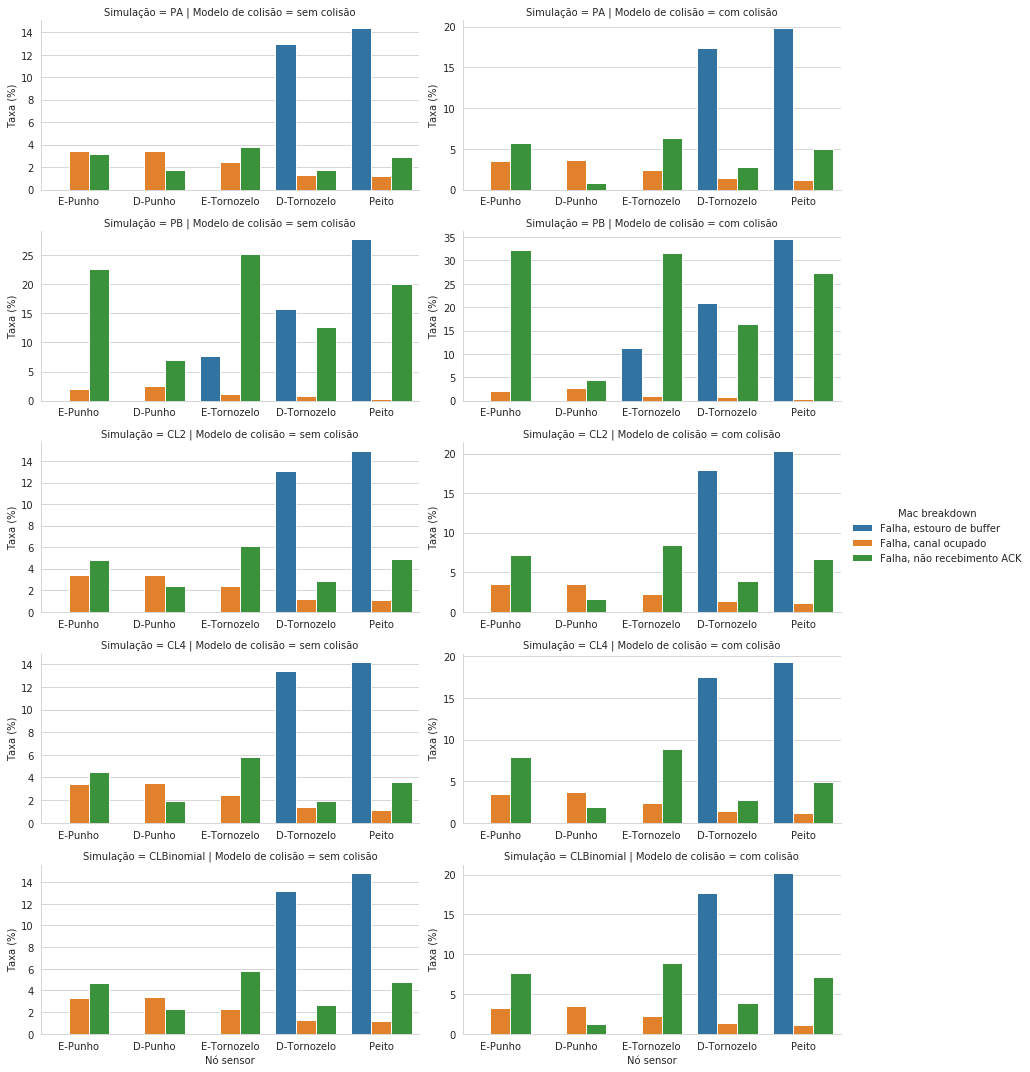

In [32]:
df = melted_data[melted_data['Taxa dados'] == 'alta']

chart_options.update({'data' : df })

grid = sns.catplot(**chart_options)
grid.set(ylabel='Taxa (%)')

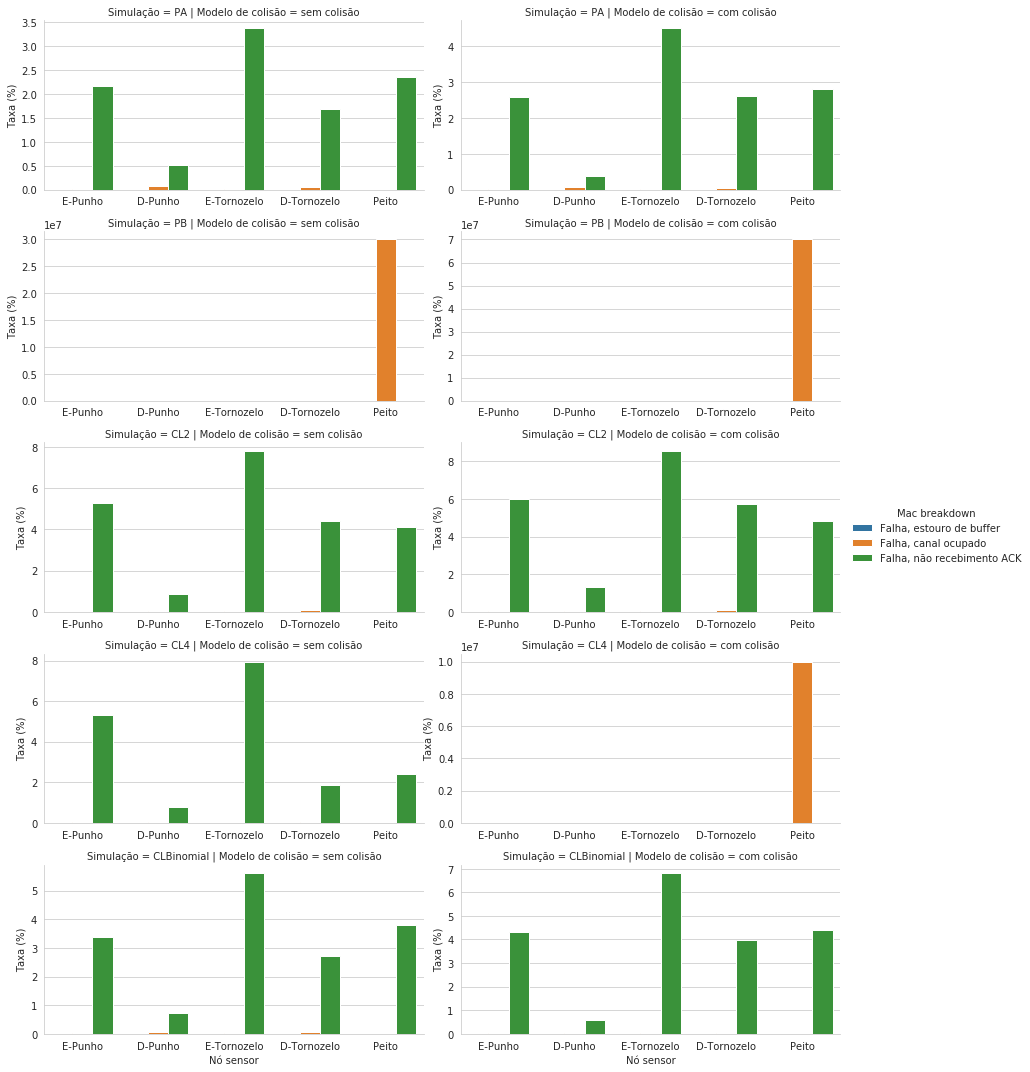

In [33]:
df = melted_data[melted_data['Taxa dados'] == 'média']

chart_options.update({'data' : df })

grid = sns.catplot(**chart_options)
grid.set(ylabel='Taxa (%)')

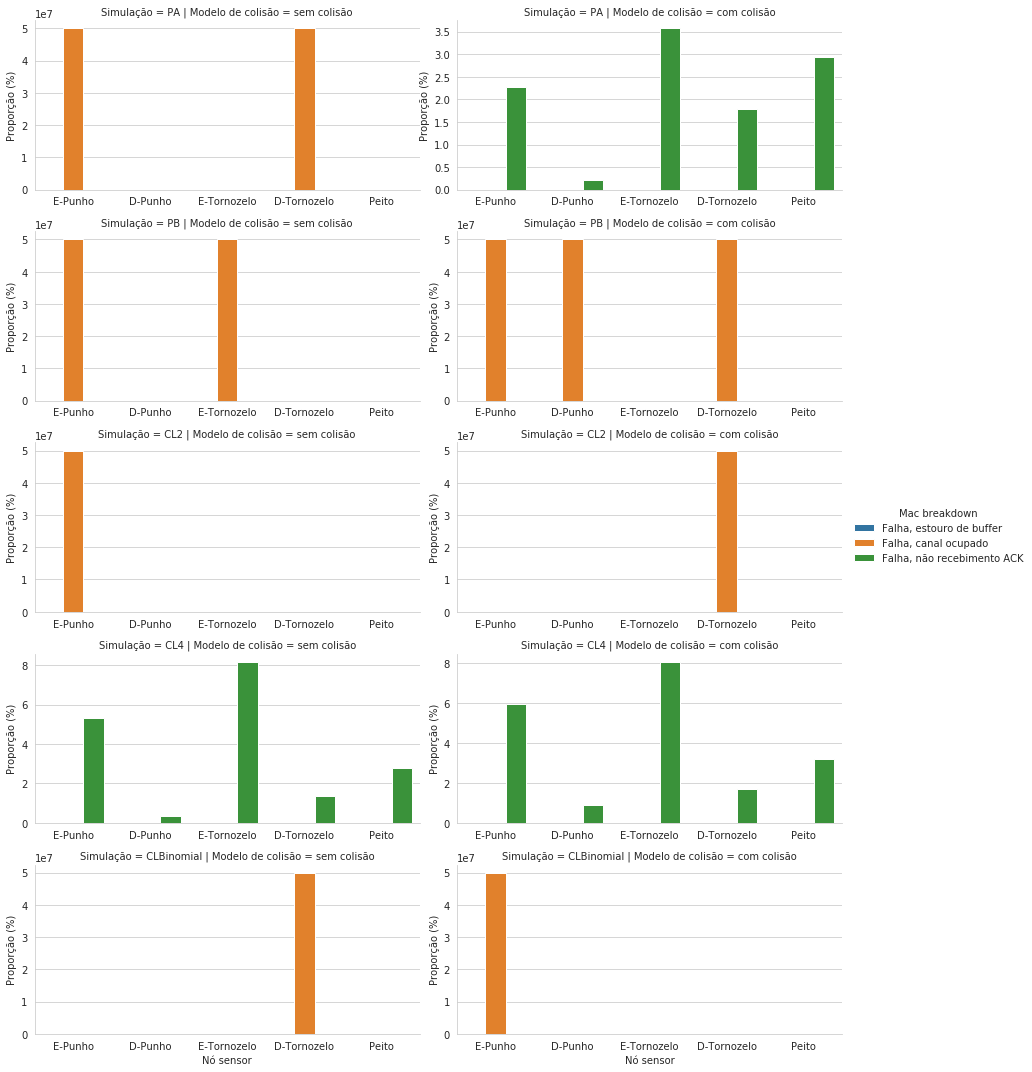

In [34]:
df = melted_data[melted_data['Taxa dados'] == 'baixa']

chart_options.update({'data' : df })

grid = sns.catplot(**chart_options)

grid.set(ylabel='Proporção (%)')

In [35]:
## Definindo estilo

plt.style.available

['seaborn-dark-palette',
 'fast',
 'seaborn-whitegrid',
 'seaborn-bright',
 'dark_background',
 'seaborn-poster',
 'classic',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'tableau-colorblind10',
 'Solarize_Light2',
 'seaborn-deep',
 'ggplot',
 'grayscale',
 'seaborn-ticks',
 'seaborn',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-white',
 'bmh',
 'seaborn-dark',
 'seaborn-colorblind',
 'seaborn-pastel',
 'seaborn-talk']

In [36]:
plt.style.use('seaborn-darkgrid')

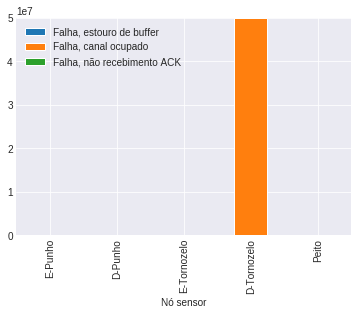

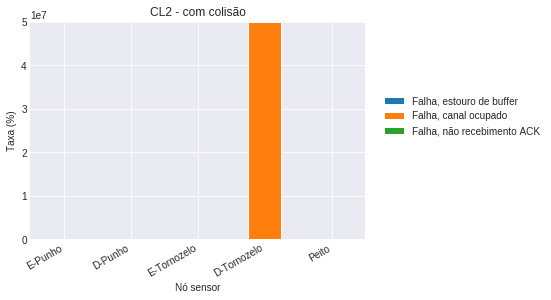

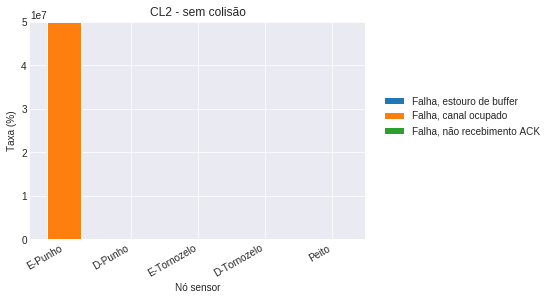

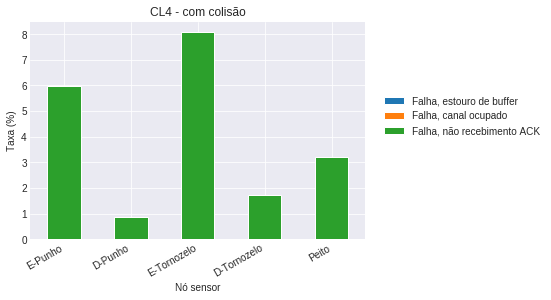

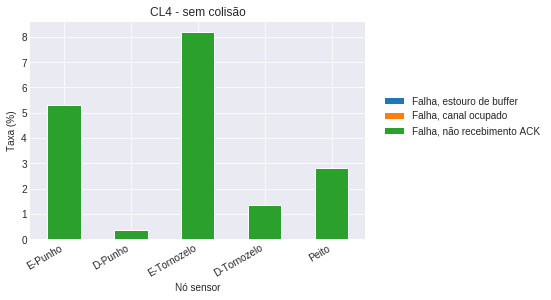

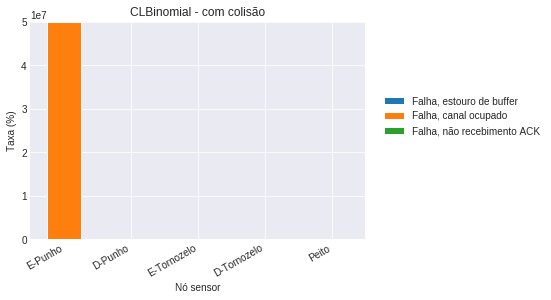

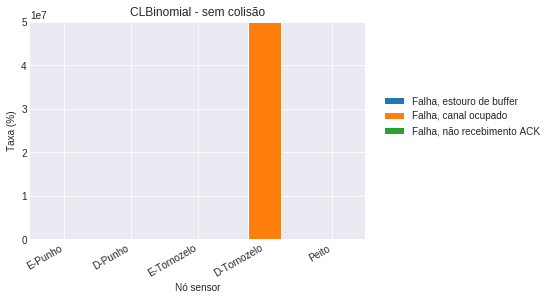

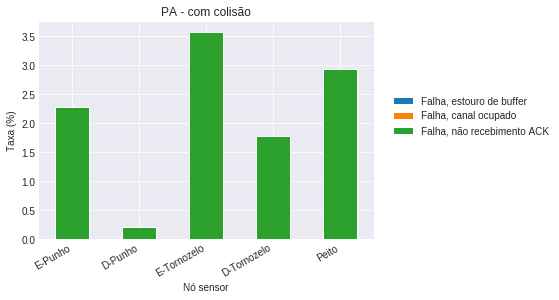

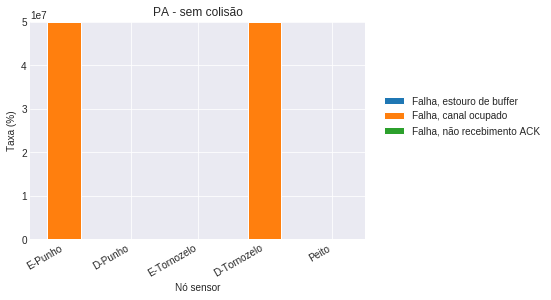

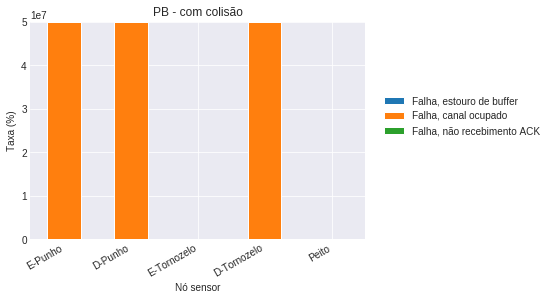

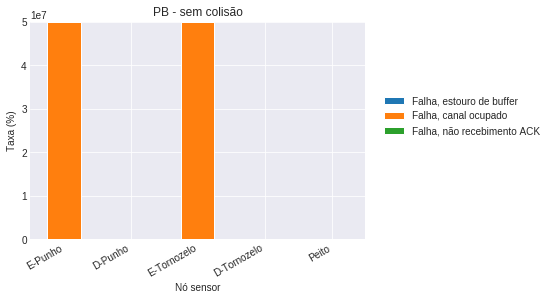

In [37]:
df = df_data[['Nó sensor','Simulação','Modelo de colisão','Taxa dados', 'Falha, estouro de buffer', 'Falha, canal ocupado', 'Falha, não recebimento ACK']]

select = df['Taxa dados'] == 'baixa'
df = df[select]

df = df.groupby(by=['Simulação', 'Modelo de colisão'])

# df.groups.keys()

axes = df.plot.bar(x="Nó sensor",stacked=True)

for t, ax in zip(df.groups.keys(),axes):
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Taxa (%)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

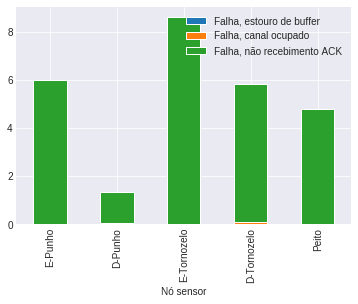

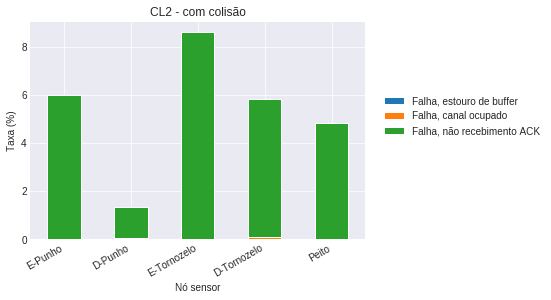

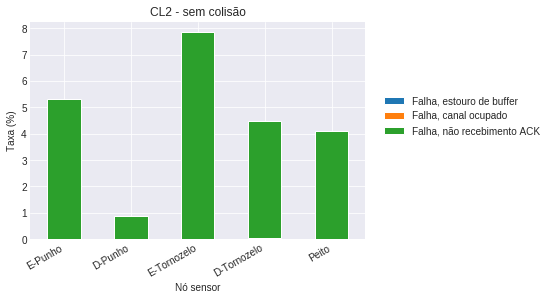

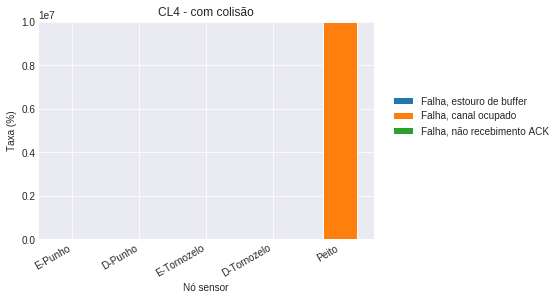

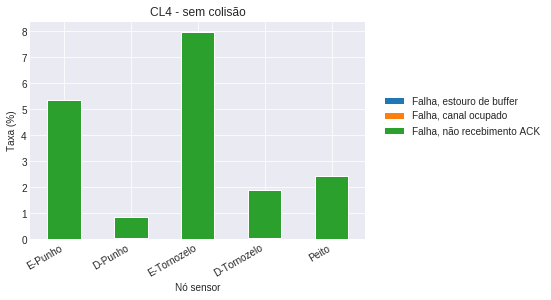

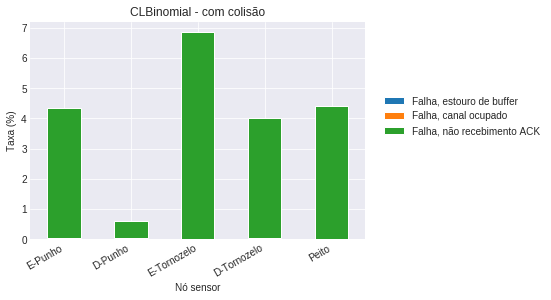

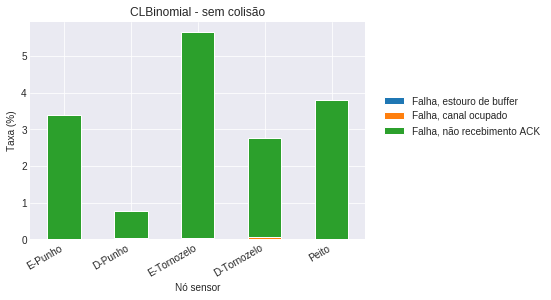

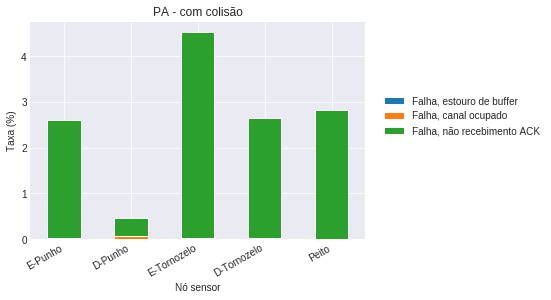

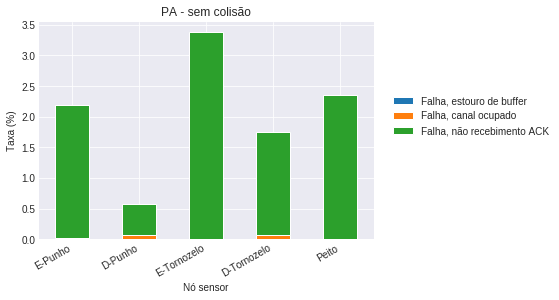

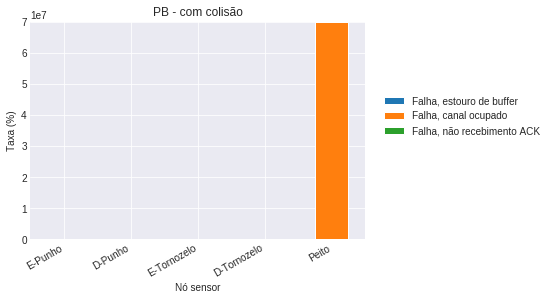

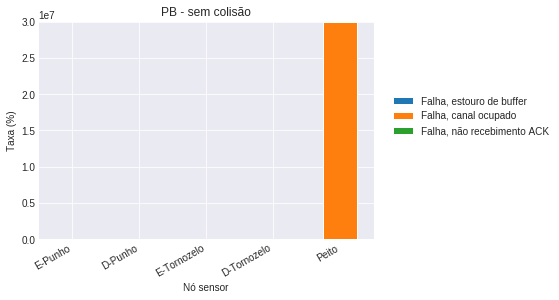

In [38]:
df = df_data[['Nó sensor','Simulação','Modelo de colisão','Taxa dados', 'Falha, estouro de buffer', 'Falha, canal ocupado', 'Falha, não recebimento ACK']]

select = df['Taxa dados'] == 'média'
df = df[select]

df = df.groupby(by=['Simulação', 'Modelo de colisão'])

# df.groups.keys()

axes = df.plot.bar(x="Nó sensor",stacked=True)

for t, ax in zip(df.groups.keys(),axes):
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Taxa (%)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

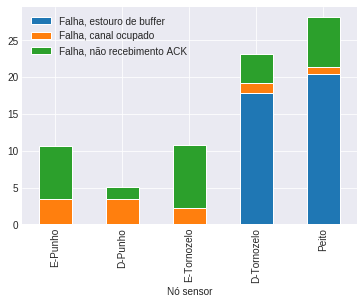

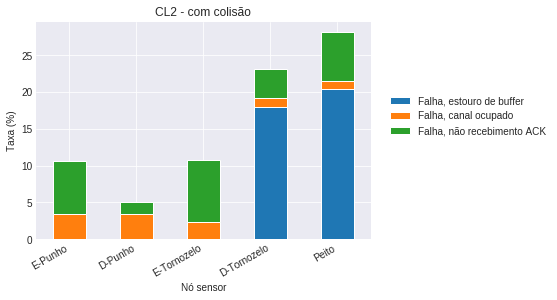

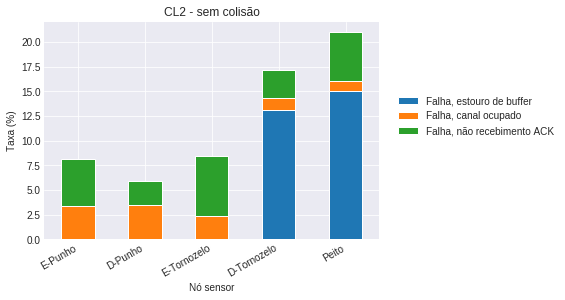

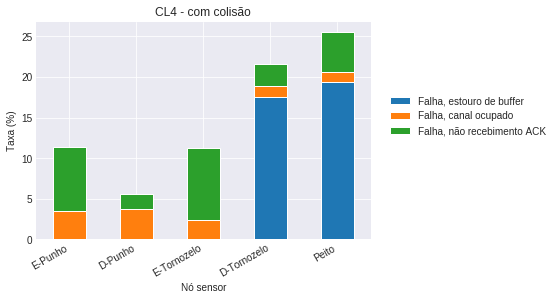

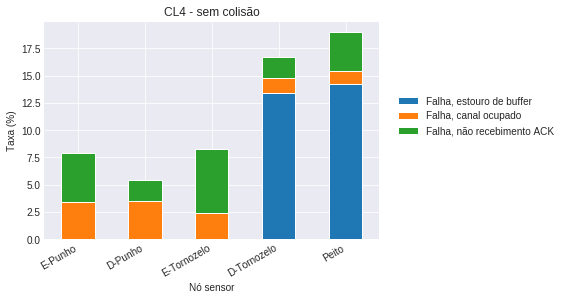

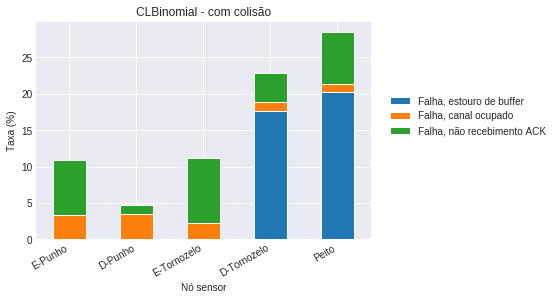

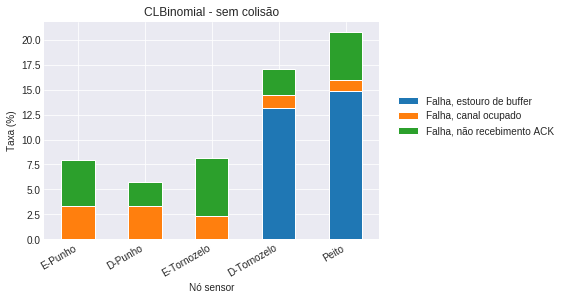

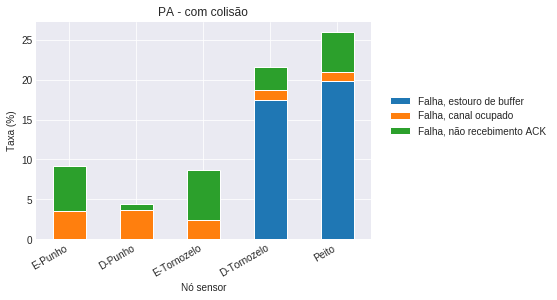

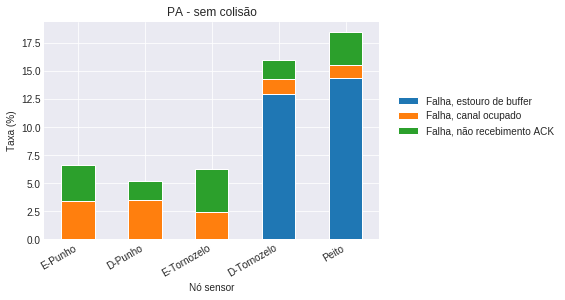

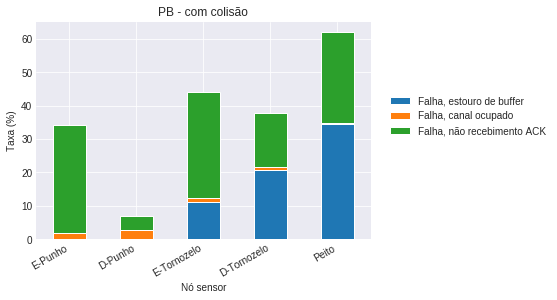

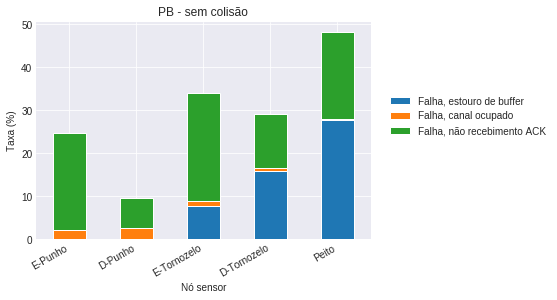

In [39]:
df = df_data[['Nó sensor','Simulação','Modelo de colisão','Taxa dados', 'Falha, estouro de buffer', 'Falha, canal ocupado', 'Falha, não recebimento ACK']]

select = df['Taxa dados'] == 'alta'
df = df[select]

df = df.groupby(by=['Simulação', 'Modelo de colisão'])

# df.groups.keys()

axes = df.plot.bar(x="Nó sensor",stacked=True)

for t, ax in zip(df.groups.keys(),axes):
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Taxa (%)')
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

In [40]:
melted_data.head()

,Simulação,Modelo de colisão,Nó sensor,Taxa dados,Mac breakdown,Valor
0,PA,sem colisão,E-Punho,alta,"Falha, estouro de buffer",0.000
1,PA,sem colisão,D-Punho,alta,"Falha, estouro de buffer",0.000
2,PA,sem colisão,E-Tornozelo,alta,"Falha, estouro de buffer",0.000
3,PA,sem colisão,D-Tornozelo,alta,"Falha, estouro de buffer",12.939
4,PA,sem colisão,Peito,alta,"Falha, estouro de buffer",14.335


In [41]:
def basic_mac_breakdown(simulacao, modelo_colisao,taxa_dados):
    
    select_potencia = melted_data['Simulação'] == simulacao
    select_modelo_colisao = melted_data['Modelo de colisão'] == modelo_colisao
    select_taxa_dados = melted_data['Taxa dados'] == taxa_dados

    df = melted_data[select_potencia & select_modelo_colisao & select_taxa_dados]

    ax = sns.catplot(data=df,
                     x='Nó sensor',
                     y='Valor',
                     hue='Mac breakdown',
                     sharex=True,
                     height=3,
                     aspect=2,
                     kind='bar',
                     legend=False
                    )
#     title_schema = f'{simulacao} - taxa de dados {taxa_dados} - {modelo_colisao}'
    title_schema = f'Perda no Envio de Pacotes {modelo_colisao}\nCamada MAC - {simulacao}'
    ax.set(title=title_schema,ylabel='Porcentagem de pacotes (%)',)
    ax.add_legend(title='Tipos de Falhas')
    
    return ax

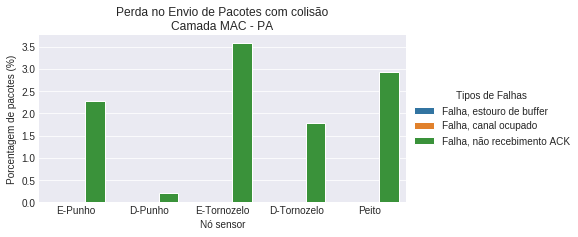

In [42]:
ax = basic_mac_breakdown('PA','com colisão','baixa')

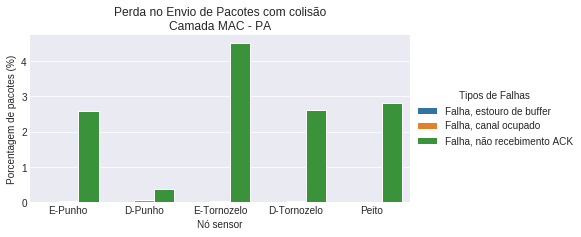

In [43]:
ax = basic_mac_breakdown('PA','com colisão','média')

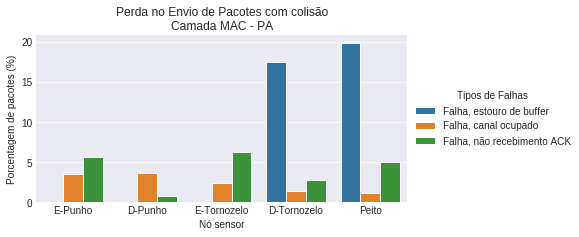

In [44]:
ax = basic_mac_breakdown('PA','com colisão','alta')

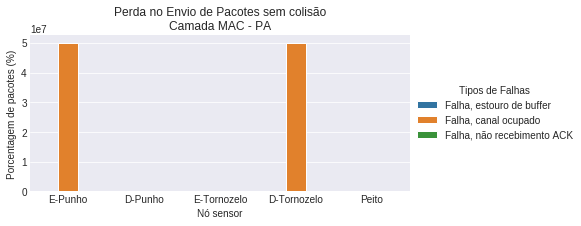

In [45]:
ax = basic_mac_breakdown('PA','sem colisão','baixa')

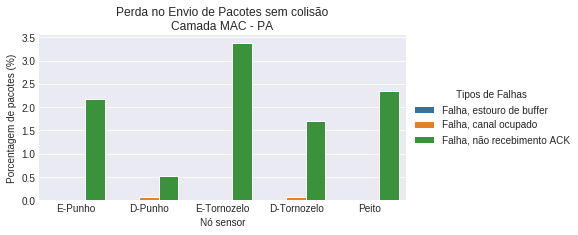

In [46]:
ax = basic_mac_breakdown('PA','sem colisão','média')

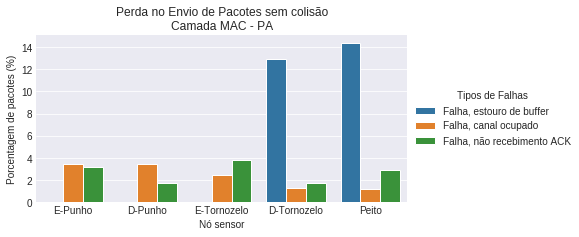

In [47]:
ax = basic_mac_breakdown('PA','sem colisão','alta')

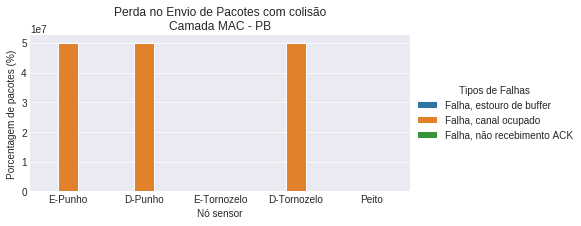

In [48]:
ax = basic_mac_breakdown('PB','com colisão','baixa')

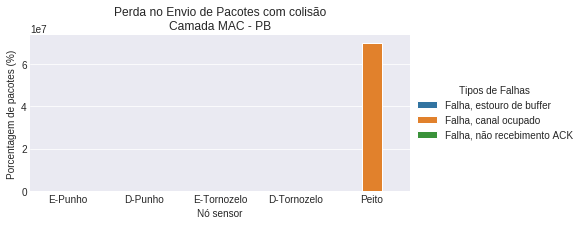

In [49]:
ax = basic_mac_breakdown('PB','com colisão','média')

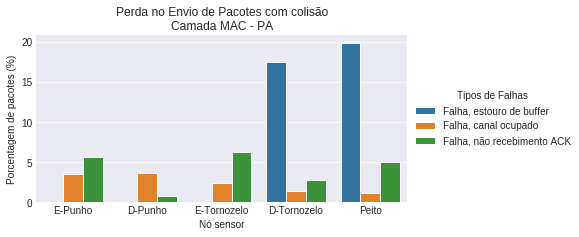

In [50]:
ax = basic_mac_breakdown('PA','com colisão','alta')

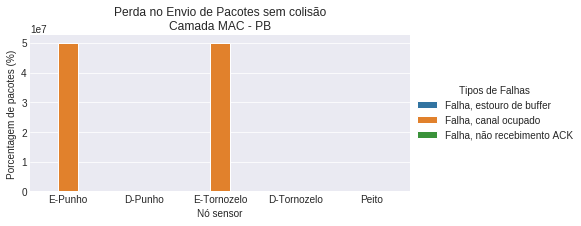

In [51]:
ax = basic_mac_breakdown('PB','sem colisão','baixa')

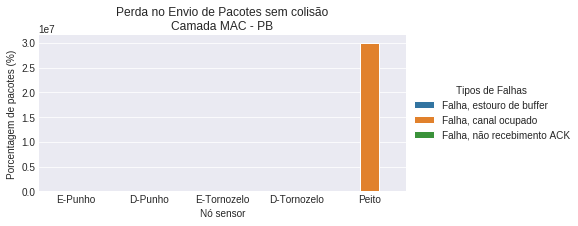

In [52]:
ax = basic_mac_breakdown('PB','sem colisão','média')

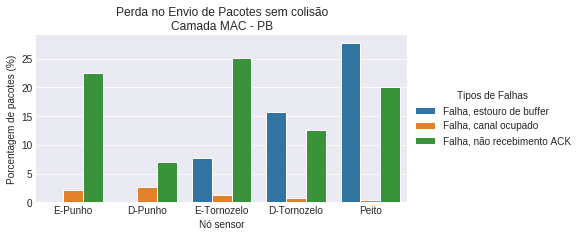

In [53]:
ax = basic_mac_breakdown('PB','sem colisão','alta')

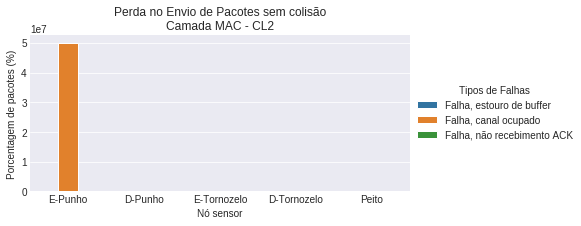

In [54]:
ax = basic_mac_breakdown('CL2','sem colisão','baixa')

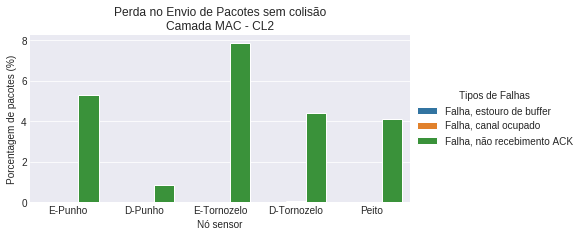

In [55]:
ax = basic_mac_breakdown('CL2','sem colisão','média')

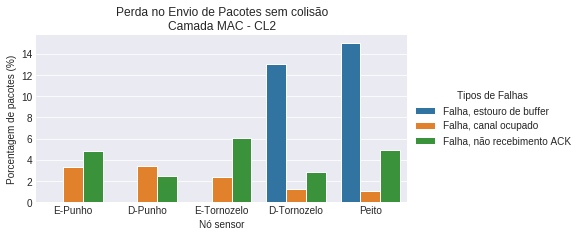

In [56]:
ax = basic_mac_breakdown('CL2','sem colisão','alta')

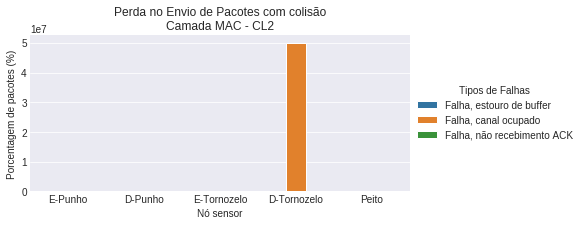

In [57]:
ax = basic_mac_breakdown('CL2','com colisão','baixa')

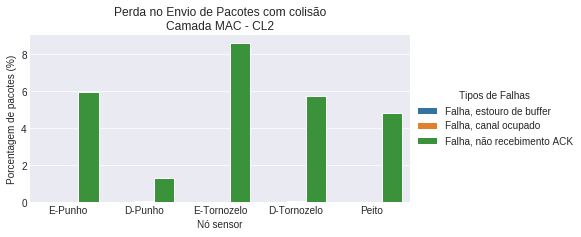

In [58]:
ax = basic_mac_breakdown('CL2','com colisão','média')

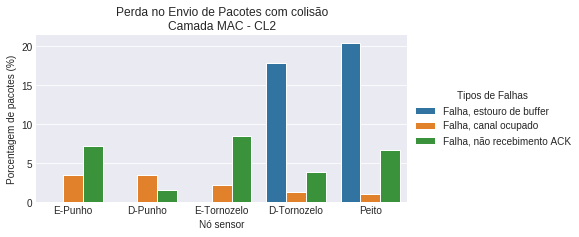

In [59]:
ax = basic_mac_breakdown('CL2','com colisão','alta')

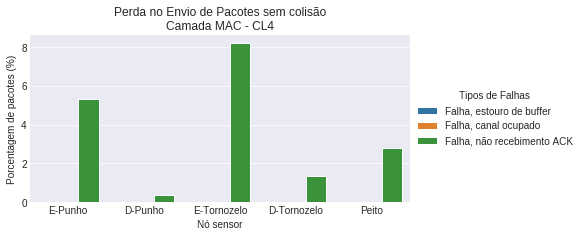

In [60]:
ax = basic_mac_breakdown('CL4','sem colisão','baixa')

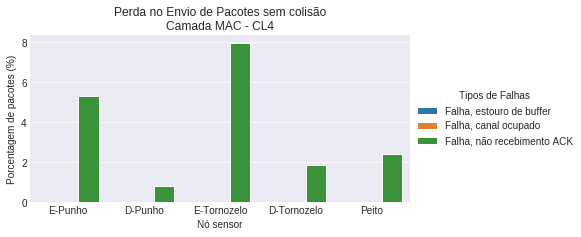

In [61]:
ax = basic_mac_breakdown('CL4','sem colisão','média')

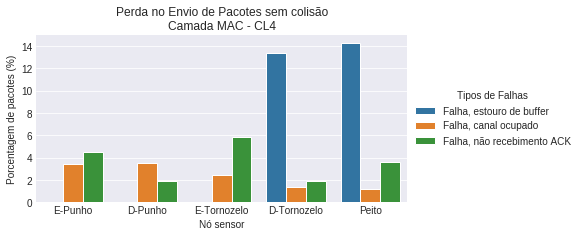

In [62]:
ax = basic_mac_breakdown('CL4','sem colisão','alta')

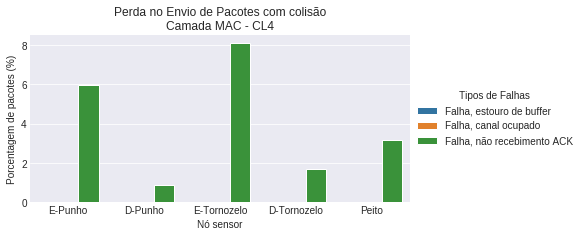

In [63]:
ax = basic_mac_breakdown('CL4','com colisão','baixa')

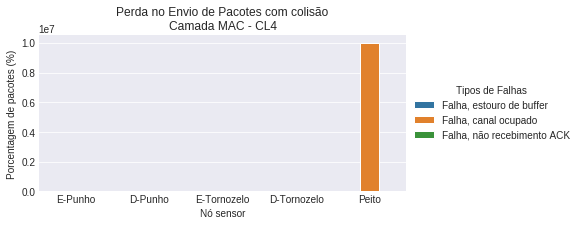

In [64]:
ax = basic_mac_breakdown('CL4','com colisão','média')

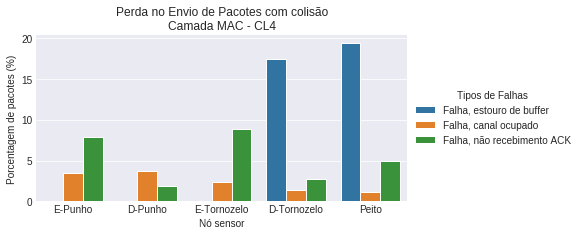

In [65]:
ax = basic_mac_breakdown('CL4','com colisão','alta')

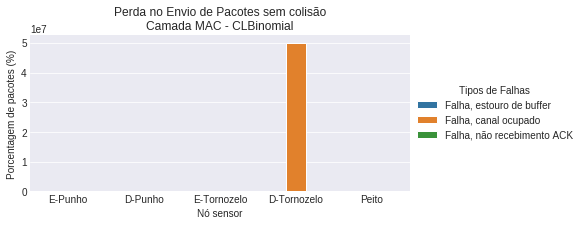

In [66]:
ax = basic_mac_breakdown('CLBinomial','sem colisão','baixa')

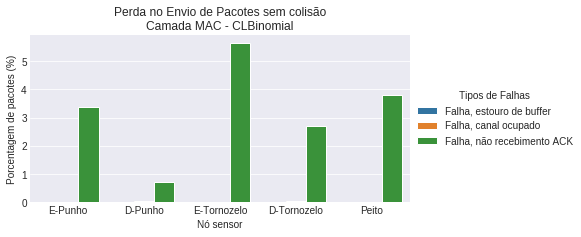

In [67]:
ax = basic_mac_breakdown('CLBinomial','sem colisão','média')

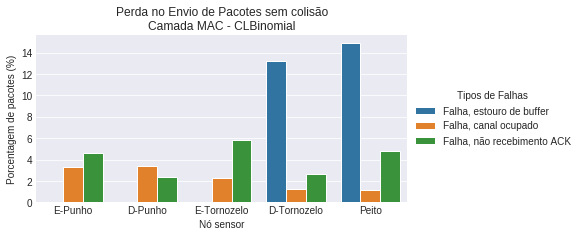

In [68]:
ax = basic_mac_breakdown('CLBinomial','sem colisão','alta')

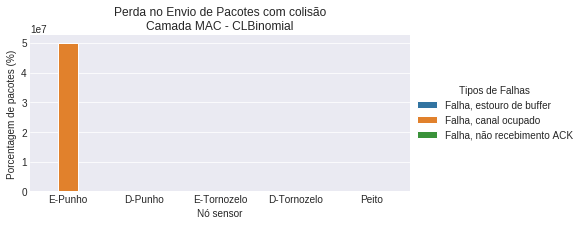

In [69]:
ax = basic_mac_breakdown('CLBinomial','com colisão','baixa')

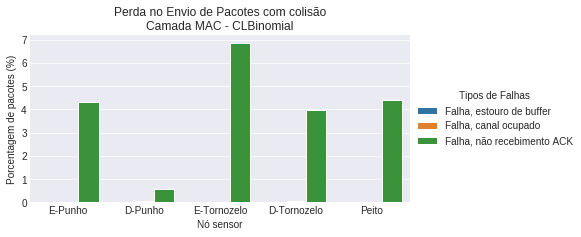

In [70]:
ax = basic_mac_breakdown('CLBinomial','com colisão','média')

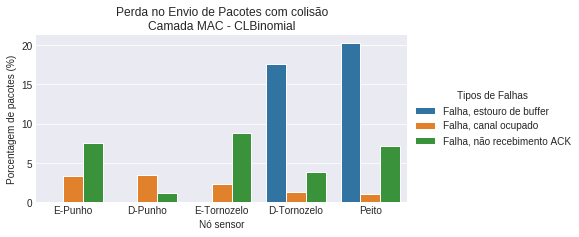

In [71]:
ax = basic_mac_breakdown('CLBinomial','com colisão','alta')

In [72]:
del melted_data
## Inicializando no

In [73]:
df = df_data.describe()

In [74]:
value_vars = set(df.columns) - set(['Falha, estouro de buffer', 'Falha, canal ocupado'])
value_vars = list(value_vars)
id_vars = set(df_data.columns) - set(df.columns)
id_vars = list(id_vars)

In [75]:
melted_data = df_data.melt(id_vars=id_vars,
                     value_vars=value_vars,
                     value_name='Valor',
                     var_name='Pacotes MAC'
                    )

In [76]:
melted_data.head()

,Simulação,Modelo de colisão,Nó sensor,Taxa dados,Pacotes MAC,Valor
0,PA,sem colisão,E-Punho,alta,"Sucesso, retransmissão",19.796
1,PA,sem colisão,D-Punho,alta,"Sucesso, retransmissão",19.761
2,PA,sem colisão,E-Tornozelo,alta,"Sucesso, retransmissão",17.248
3,PA,sem colisão,D-Tornozelo,alta,"Sucesso, retransmissão",12.097
4,PA,sem colisão,Peito,alta,"Sucesso, retransmissão",12.294


In [77]:
def barchart_pacotes_enviados_mac(simulacao, modelo_colisao,taxa_dados,melted_data=melted_data):
    
    select_potencia = melted_data['Simulação'] == simulacao
    select_modelo_colisao = melted_data['Modelo de colisão'] == modelo_colisao
    select_taxa_dados = melted_data['Taxa dados'] == taxa_dados

    df = melted_data[select_potencia & select_modelo_colisao & select_taxa_dados]

    ax = sns.catplot(data=df,
                     x='Nó sensor',
                     y='Valor',
                     hue='Pacotes MAC',
                     sharex=True,
                     height=3,
                     aspect=2,
                     kind='bar',
                     legend=False
                    )
#     title_schema = f'{simulacao} - taxa de dados {taxa_dados} - {modelo_colisao}'
    title_schema = f'Pacotes Enviados pela Camada MAC - {simulacao}\n{modelo_colisao}'
    ax.set(title=title_schema,ylabel='Porcentagem (%)',)
    ax.add_legend(title='Legenda')
    
    return ax

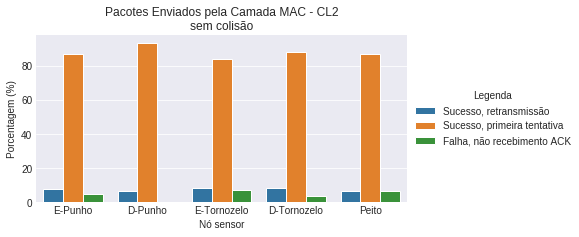

In [78]:
grid = barchart_pacotes_enviados_mac('CL2','sem colisão','baixa')

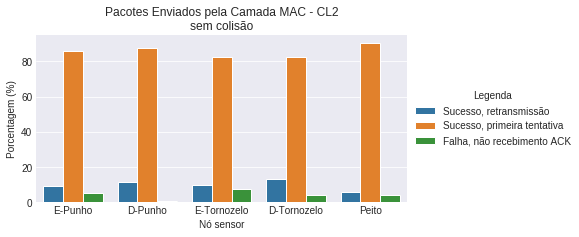

In [79]:
grid = barchart_pacotes_enviados_mac('CL2','sem colisão','média')

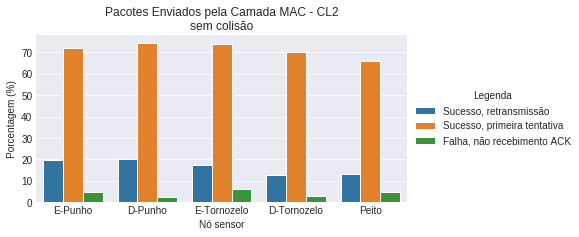

In [80]:
grid = barchart_pacotes_enviados_mac('CL2','sem colisão','alta')

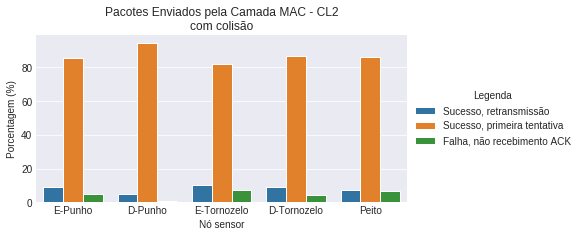

In [81]:
grid = barchart_pacotes_enviados_mac('CL2','com colisão','baixa')

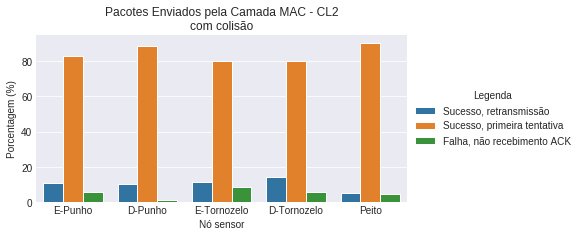

In [82]:
grid = barchart_pacotes_enviados_mac('CL2','com colisão','média')

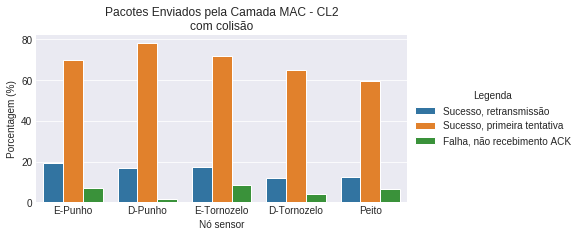

In [83]:
grid = barchart_pacotes_enviados_mac('CL2','com colisão','alta')

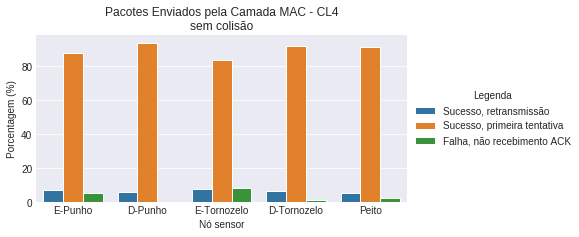

In [84]:
grid = barchart_pacotes_enviados_mac('CL4','sem colisão','baixa')

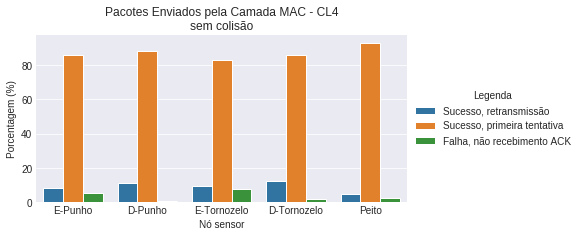

In [85]:
grid = barchart_pacotes_enviados_mac('CL4','sem colisão','média')

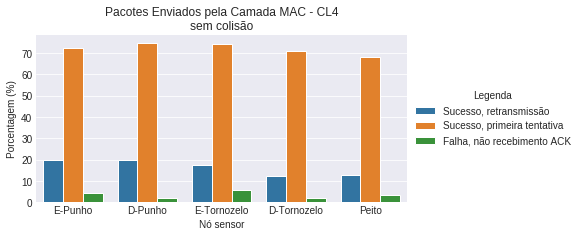

In [86]:
grid = barchart_pacotes_enviados_mac('CL4','sem colisão','alta')

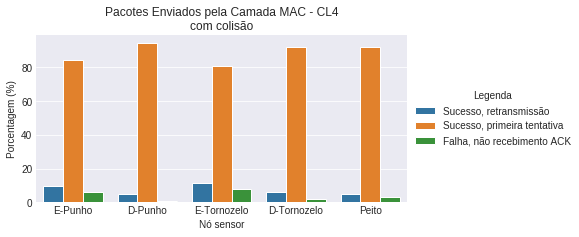

In [87]:
grid = barchart_pacotes_enviados_mac('CL4','com colisão','baixa')

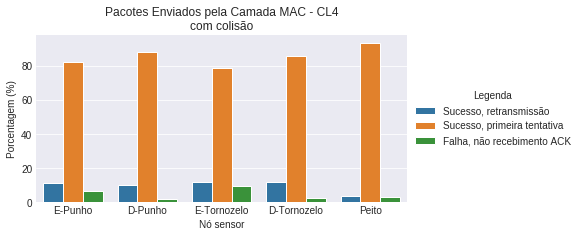

In [88]:
grid = barchart_pacotes_enviados_mac('CL4','com colisão','média')

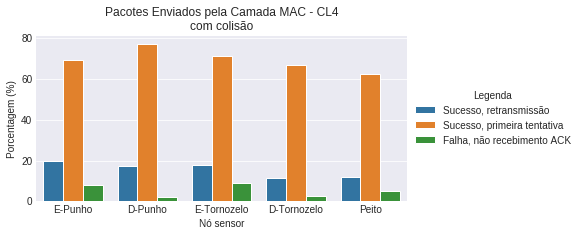

In [89]:
grid = barchart_pacotes_enviados_mac('CL4','com colisão','alta')

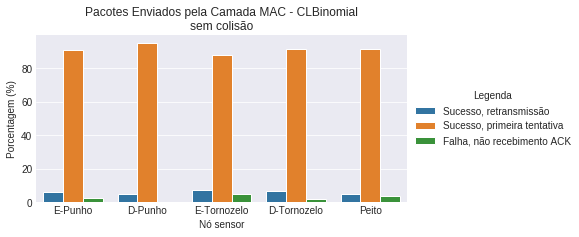

In [90]:
grid = barchart_pacotes_enviados_mac('CLBinomial','sem colisão','baixa')

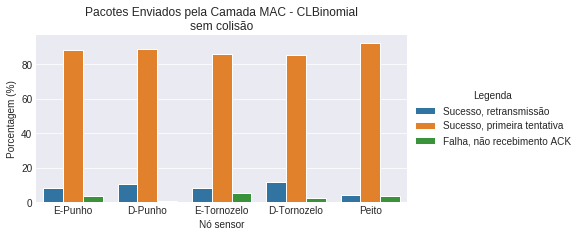

In [91]:
grid = barchart_pacotes_enviados_mac('CLBinomial','sem colisão','média')

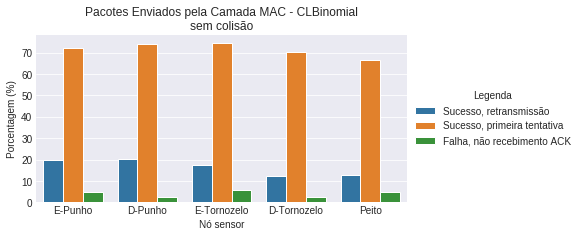

In [92]:
grid = barchart_pacotes_enviados_mac('CLBinomial','sem colisão','alta')

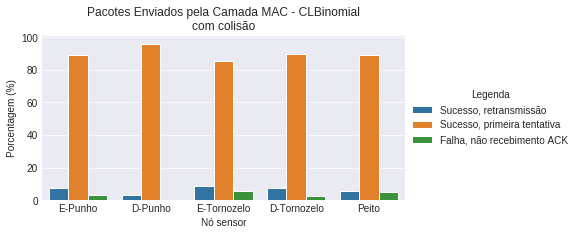

In [93]:
grid = barchart_pacotes_enviados_mac('CLBinomial','com colisão','baixa')

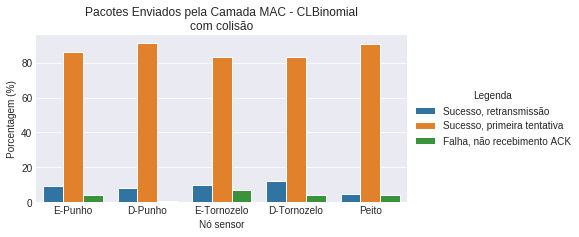

In [94]:
grid = barchart_pacotes_enviados_mac('CLBinomial','com colisão','média')

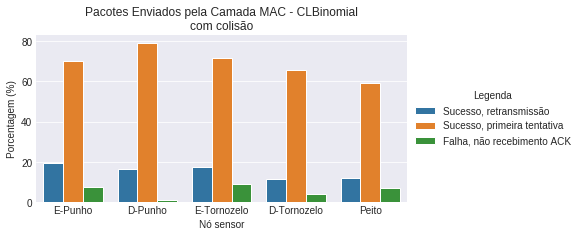

In [95]:
grid = barchart_pacotes_enviados_mac('CLBinomial','com colisão','alta')